In [0]:
pip install --upgrade tensorflow


In [0]:
import tensorflow as tf 
tf.__version__

In [15]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist  #28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() #divide the data set into train and test

x_train = tf.keras.utils.normalize(x_train, axis=1) #normalise the data that varie between 0 and 255  (pixel =8bits)
x_test = tf.keras.utils.normalize(x_test, axis=1)
 #model building

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #output layer

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3) # the neural network will see each unique sample 3 times.



Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9774


In [0]:
#exemple

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary) # black and white image


print(x_train[0])

In [17]:
#Out of sample accuracy slightly lower 
#Out of sample loss slightly higher

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0894 - accuracy: 0.9731
0.08942832052707672 0.9731000065803528


In [43]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [0]:
new_model = tf.keras.models.load_model('num_reader.model')
                              

In [0]:


predictions = new_model.predict(x_test)

In [52]:
#Array of probability distributions
print(predictions)


[[4.2253707e-09 1.7202598e-08 4.7114563e-06 ... 9.9993217e-01
  6.9984111e-08 3.8415699e-08]
 [1.2631829e-10 6.6188863e-05 9.9993217e-01 ... 1.5827067e-10
  3.9301415e-09 1.3675733e-13]
 [6.2413854e-08 9.9978906e-01 9.5319365e-06 ... 2.9552606e-05
  1.4490807e-04 5.1269262e-07]
 ...
 [1.1436131e-08 3.6276097e-07 1.7890748e-08 ... 1.2789491e-06
  2.4019238e-05 4.3251272e-04]
 [9.0180414e-08 3.2777714e-07 1.2456659e-08 ... 9.8665957e-08
  3.4719676e-04 1.6799450e-09]
 [1.8037602e-07 4.8114376e-08 1.2368679e-06 ... 4.2500856e-10
  5.4684892e-07 5.8824581e-09]]


In [53]:
#Predict 0th index
import numpy as np
print(np.argmax(predictions[0]))

7


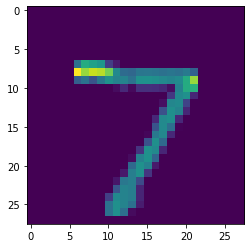

In [54]:
#Confirmation
plt.imshow(x_test[0])
plt.show()

In [55]:
#Predict 0th index
import numpy as np
print(np.argmax(predictions[5]))

1


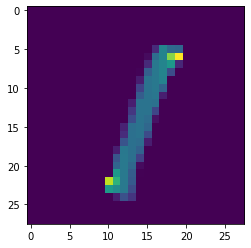

In [56]:
plt.imshow(x_test[5
                  ])
plt.show()